In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
import torchvision as tv
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.en_conv = nn.Sequential(
            nn.Conv2d(1, 16, 4, 2, 1),
            nn.BatchNorm2d(16),
            nn.Tanh(),
            
            nn.Conv2d(16, 32, 4, 2, 1),
            nn.BatchNorm2d(32),
            nn.Tanh(),
            
            nn.Conv2d(32, 16, 3, 1, 1),
            nn.BatchNorm2d(16),
            nn.Tanh()
        )
        self.en_fc = nn.Linear(16*7*7, 10)
        self.de_fc = nn.Linear(10, 16*7*7)
        self.de_conv = nn.Sequential(
            nn.ConvTranspose2d(16, 16, 4, 2, 1),
            nn.BatchNorm2d(16),
            nn.Tanh(),
            nn.ConvTranspose2d(16, 1, 4, 2, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        en = self.en_conv(x)
        code = self.en_fc(en.view(en.size(0), -1))
        de = self.de_fc(code)
        decoded = self.de_conv(de.view(de.size(0), 16, 7, 7))
        return code, decoded

In [3]:
lr = 1e-3
batch_size = 64
train_dataset = tv.datasets.MNIST(root='F:\\大三下课程\\深度学习\\第六次作业\\MNIST',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=False)

test_dataset = tv.datasets.MNIST(root='F:\\大三下课程\\深度学习\\第六次作业\\MNIST',
                              train=False,
                              transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

auto_encoder = AutoEncoder()
optim = torch.optim.Adam(auto_encoder.parameters(), lr=lr)
loss_fn = nn.MSELoss()
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [4]:
epoch = 20

for i in range(epoch):
    for batch_images, labels in train_loader:
        code, output = auto_encoder(batch_images)
        loss = loss_fn(output, batch_images)
        optim.zero_grad()
        loss.backward()
        optim.step()
        
    print('epoch:%d, loss:%6.4f' %(i+1, loss.item()))

epoch:1, loss:0.0272
epoch:2, loss:0.0246
epoch:3, loss:0.0241
epoch:4, loss:0.0150
epoch:5, loss:0.0157
epoch:6, loss:0.0160
epoch:7, loss:0.0164
epoch:8, loss:0.0171
epoch:9, loss:0.0172
epoch:10, loss:0.0175
epoch:11, loss:0.0151
epoch:12, loss:0.0148
epoch:13, loss:0.0178
epoch:14, loss:0.0174
epoch:15, loss:0.0176
epoch:16, loss:0.0168
epoch:17, loss:0.0169
epoch:18, loss:0.0176
epoch:19, loss:0.0142
epoch:20, loss:0.0157


In [5]:
#可视化效果
for i,j in train_loader:
    batch_images = i
    break
code, batch_output = auto_encoder(batch_images)
batch_output.shape

torch.Size([64, 1, 28, 28])

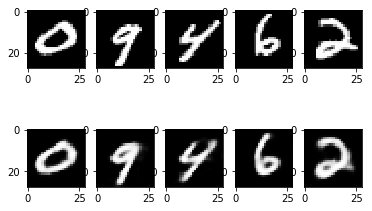

In [6]:
#可视化效果，第一行为原图，第二行为压缩后的图
import numpy as np
for i in range(10):
    plt.subplot(2, 5, i + 1)
    if i < 5:
        plt.imshow((batch_images[i] *255).view([28, 28]).to(torch.uint8).numpy(), cmap='gray')
    else:
        plt.imshow((batch_output[i - 5] *255).view([28, 28]).to(torch.uint8).numpy(), cmap='gray')

In [7]:
# 保存模型参数
torch.save(auto_encoder.state_dict(), 'params')